In [1]:
# Imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import defaultdict
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
# Loading in data
mental_health_df = pd.read_csv('mental_health_clean_v2.csv')

## Creating Graph Functions

In [5]:
def create_plot(data, x_col, y_col, plot_type, title, x_label, y_label, hue=None):
    plt.figure(figsize=(10, 6))
    
    if plot_type == 'scatter':
        ax = sns.scatterplot(x=x_col, y=y_col, data=data, hue=hue)
    elif plot_type == 'bar':
        ax = sns.barplot(x=x_col, y=y_col, data=data, hue=hue)
        plt.xticks(rotation=90)
    elif plot_type == 'box':
        ax = sns.boxplot(x=x_col, y=y_col, data=data, hue=hue)
        plt.xticks(rotation=90)
    elif plot_type == 'hist':
        ax = sns.histplot(data=data[x_col], kde=True, hue=hue)
    elif plot_type == 'violin':
        ax = sns.violinplot(x=x_col, y=y_col, data=data, hue=hue)
        plt.xticks(rotation=90)
    elif plot_type == 'count':
        ax = sns.countplot(x=x_col, data=data, hue=hue, order=data[x_col].value_counts().index)
        plt.xticks(rotation=90)
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.legend(title=hue, loc='upper right') if hue else None
    plt.show()

# Basic Information

> The data is largely clean with no duplicates, correct data types, no null values, and nothing that looks super out of place upon initial inspection. 

> We started with 5 features, 2 of them categorical and 3 of them numerical. After transformation there are 16 features, 13 of them categorical and 3 of them numerical.

> There are several things I did in order to make the data easier to extract interesting insights from. I found that every year has 12 questions in common, so I transformed the data and added each of those common questions as columns. 

> When looking at outliers, I found that two of the rows are unusually high and some of the rows are unusually low, possibly joke answers. I'll deleted those rows (since there are so few in the dataset). Seeing as this survey is intended for working individuals in the tech field, I set the lower threshold to 18 and the higher threshold to 100. 

> I was comfortable removing 496 rows seeing as the scope of the survey is working individuals. The age values upon re-evaluation are now more concentrated, ranging approximately from 18 to 65, which is a more typical working age range. There are still a few potential outliers on the higher end, around ages 70 to 99, but these are not as extreme as the values we removed earlier. 

> A full dive into the code and process can be seen in the accompanying EDA. 

## At a glance

### Columns

- answer: The respondent's answer to the survey question. This can be a text response for open-ended questions or a selected option for closed-ended questions.
- survey_year: The year in which the survey was conducted.
- user_id: A unique identifier for each respondent.
- question: The survey question that corresponds to the answer.
- age: The age of the respondent.
- employer_mh_benefits: The respondent's perception of their employer's mental health benefits. Possible responses could include options like "Yes", "No", "I don't know", etc.
- anonymity: The respondent's perception of anonymity protection for employees who seek mental health treatment. Possible responses could include options like "Yes", "No", "I don't know", etc.
- mh_interview: The respondent's willingness to discuss mental health issues in a job interview. Possible responses could include options like "Yes", "No", "Maybe", etc.
- gender: The gender identity of the respondent.
- country: The country where the respondent is located.
- us_state: If the respondent is located in the United States, this column contains the state. For respondents outside of the United States, this field is missing.
- self_employed: A binary indicator showing whether the respondent is self-employed. Possible responses are "Yes" and "No".
- fam_mh_illness_history: Information on whether there is a family history of mental illness. Possible responses could include options like "Yes", "No", "I don't know", etc.
- sought_mh_treatment: A binary indicator showing whether the respondent has sought treatment for a mental health condition. Possible responses are "Yes" and "No".
- employer_size: The size of the respondent's employer, typically categorized into ranges (e.g., "1-5", "6-25", "26-100", etc.).
- employer_tech: A binary indicator showing whether the respondent is employed at a tech company. Possible responses are "Yes" and "No".

### Descriptive Statistics

In [3]:
mental_health_df.describe()

,survey_year,user_id,age
count,185786.000000,185786.000000,185786.000000
mean,2016.721088,2625.556382,34.447041
std,1.334158,1037.499333,8.287599
min,2014.000000,1.000000,18.000000
25%,2016.000000,1846.000000,28.000000
50%,2017.000000,2764.000000,33.000000
75%,2018.000000,3492.000000,39.000000
max,2019.000000,4218.000000,99.000000


# Top Insights

### 1. Mental Health Awareness and Support in the Workplace
There is a noticeable gap in mental health awareness and support in the workplace, particularly in certain industries and countries.
Recommendation: Employers should increase mental health awareness programs and provide more support resources. Tailored programs may be necessary for specific industries or regions.

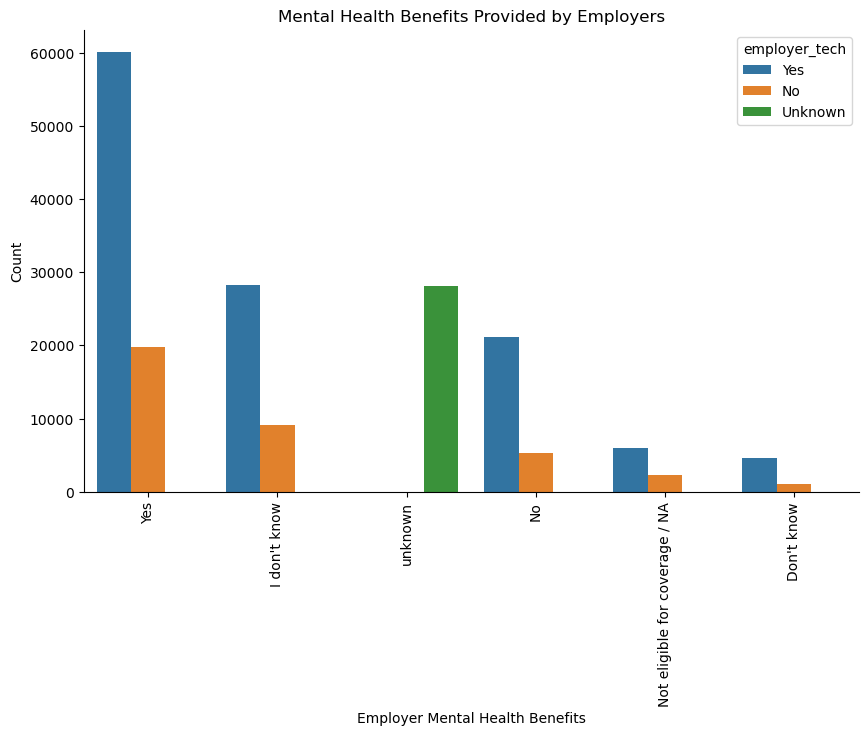

In [8]:
create_plot(mental_health_df, 'employer_mh_benefits', None, 'count', 'Mental Health Benefits Provided by Employers', 'Employer Mental Health Benefits', 'Count', hue='employer_tech')

- A significant number of employers in both tech and non-tech industries provide mental health benefits, with tech industries having a slightly higher prevalence.
- A notable portion of respondents are unsure about the availability of mental health benefits in their workplace, highlighting a potential area for improvement in communication.
- The proportion of employers not providing mental health benefits is lower in tech industries compared to non-tech industries.

### 2. Age and Perception of Mental Health
Younger employees tend to be more open about discussing mental health issues, but they also perceive a higher likelihood of negative consequences.
Recommendation: Create a supportive environment for employees of all ages to discuss mental health, and ensure that policies are in place to prevent any negative repercussions.

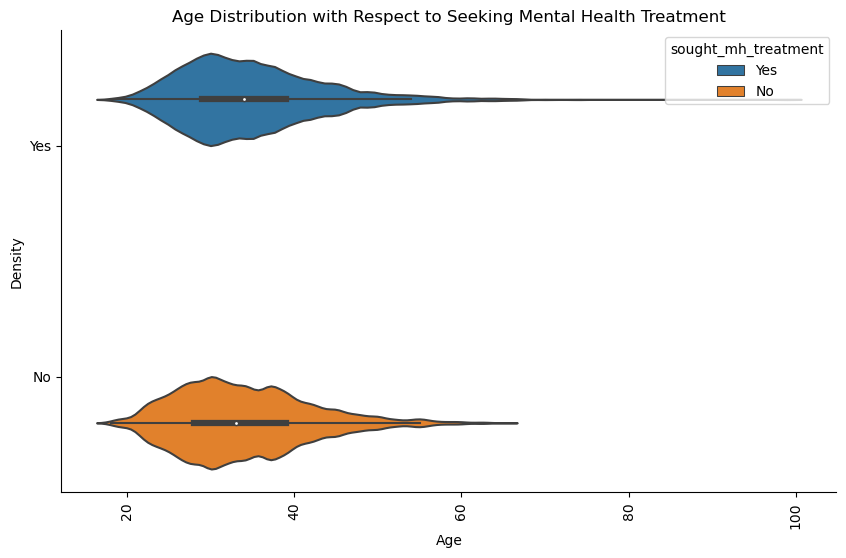

In [9]:
create_plot(mental_health_df, 'age', 'sought_mh_treatment', 'violin', 'Age Distribution with Respect to Seeking Mental Health Treatment', 'Age', 'Density', hue='sought_mh_treatment')

- Respondents across a wide age range have sought mental health treatment, indicating that mental health issues affect people of all ages.
- The distribution of ages for those who have and have not sought treatment are quite similar, though there is a slight increase in density for younger ages among those who have sought treatment.
- There is a notable number of outliers in the age data, particularly on the higher end, which may need to be addressed for more accurate analysis.

### 3. Gender Differences in Mental Health Dialogue
Gender plays a role in how individuals perceive and discuss mental health issues, with noticeable differences in comfort levels and perceived consequences.
Recommendation: Promote an inclusive culture that encourages open dialogue about mental health, regardless of gender. Address any gender-specific concerns or barriers to communication.

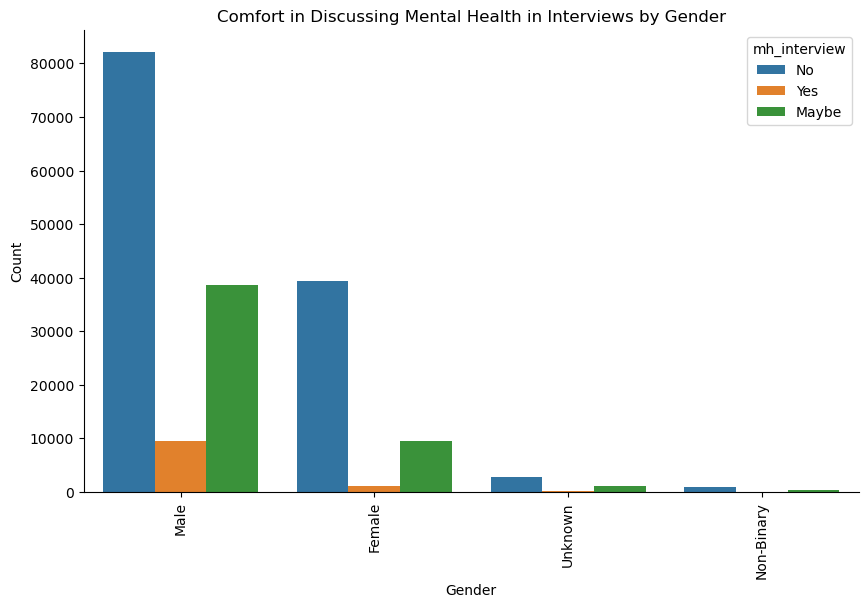

In [10]:
gender_mapping = {
    'Male': 'Male',
    'Female': 'Female',
    'Other': 'Other'
}
mental_health_df['gender_cleaned'] = mental_health_df['gender'].replace(gender_mapping).fillna('Other')

create_plot(mental_health_df, 'gender_cleaned', None, 'count', 'Comfort in Discussing Mental Health in Interviews by Gender', 'Gender', 'Count', hue='mh_interview')

- A majority of respondents, regardless of gender, are not comfortable discussing mental health issues during a job interview.
- The level of discomfort is notably higher among male respondents compared to female respondents.
- A small proportion of respondents are comfortable or might consider discussing mental health issues during a job interview, with females being slightly more open to this compared to males.

### 4. Remote Work and Mental Health
The prevalence of remote work varies between industries, and it has implications for mental health and the perception of employer support.
Recommendation: For industries with higher rates of remote work, ensure that remote employees have access to mental health resources and feel supported.

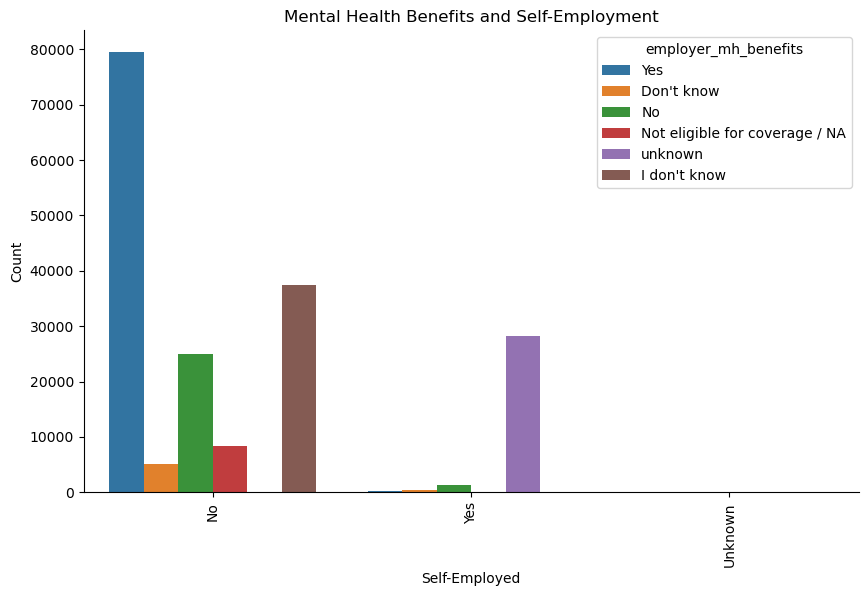

In [11]:
create_plot(mental_health_df, 'self_employed', None, 'count', 'Mental Health Benefits and Self-Employment', 'Self-Employed', 'Count', hue='employer_mh_benefits')

- A large portion of self-employed individuals are unaware of mental health benefits, which is understandable since they might not have a traditional employer.
- Among those who are not self-employed, a significant number have access to mental health benefits from their employer.
- There is a notable number of individuals, both self-employed and not, who are unsure about the availability of mental health benefits, indicating a potential area for improvement in awareness and communication.